## Exploracion de dataset

In [141]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [142]:
df = pd.read_json('https://raw.githubusercontent.com/arielRas/DataAdqusition/master/API%20MercadoLibre/MeliCarPublications.json')
df.head(3)

,id,category_id,title,condition,car_year,brand,model,version,engine,engine_power,...,transmission,currency,price,seller_id,seller_nickname,is_car_shop,seller_country,seller_state,seller_city,seller_neighborhood
0,MLA1413685801,MLA1744,Volkswagen Gol 1.4 3ptas Año 2013 - Liv Motors,Usado,2013,Volkswagen,Gol,1.4 Power 83cv 3 p,1.4,83 hp,...,Manual,ARS,6000000,780050555,LIVMOTORS 2,False,Argentina,Bs.As. G.B.A. Norte,Vicente López,Munro
1,MLA1406864357,MLA1744,Volkswagen Gol 2012 1.4 Power Ps+ac 83cv,Usado,2012,Volkswagen,Gol,1.4 Power Ps+ac 83cv,1.4,83 hp,...,Manual,USD,10500,210095605,MASSEYGROUP EXCLUSIVOS,False,Argentina,Bs.As. G.B.A. Norte,Vicente López,Olivos
2,MLA1677544030,MLA1744,Volkswagen Gol Power 3p 2012 Financiación Con Dni,Usado,2012,Volkswagen,Gol,1.4 Power Ps+ac 83cv,1.4,83 hp,...,Manual,ARS,5800000,5571520,DASAUTOS2014,False,Argentina,Bs.As. G.B.A. Sur,Berazategui,Berazategui


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12196 entries, 0 to 12195
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12196 non-null  object 
 1   category_id          12196 non-null  object 
 2   title                12196 non-null  object 
 3   condition            12196 non-null  object 
 4   car_year             12196 non-null  int64  
 5   brand                12196 non-null  object 
 6   model                12196 non-null  object 
 7   version              12196 non-null  object 
 8   engine               11885 non-null  object 
 9   engine_power         11349 non-null  object 
 10  doors                12196 non-null  int64  
 11  km                   12196 non-null  object 
 12  fuel_type            12196 non-null  object 
 13  traction_control     11809 non-null  object 
 14  passenger_capacity   11275 non-null  float64
 15  transmission         11906 non-null  obje

In [144]:
df.describe()

,car_year,doors,passenger_capacity,price,seller_id
count,12196.000000,12196.000000,11275.000000,1.219600e+04,1.219600e+04
mean,2015.917678,4.354870,4.978271,1.054430e+07,3.439563e+08
std,6.109399,0.676806,0.249476,1.309497e+07,3.748558e+08
min,1988.000000,2.000000,2.000000,1.230000e+02,7.465000e+03
25%,2012.000000,4.000000,5.000000,1.560000e+04,9.898473e+07
50%,2016.000000,4.000000,5.000000,7.500000e+06,2.014092e+08
75%,2022.000000,5.000000,5.000000,1.675000e+07,4.105601e+08
max,2024.000000,5.000000,7.000000,5.860000e+08,1.713678e+09


## DataWrangling

### Variable ***condition***

In [145]:
df.condition.unique()

array(['Usado', 'Nuevo'], dtype=object)

In [146]:
df.rename(columns={'condition': 'is_new'}, inplace=True)
df.is_new = df.is_new.str.replace('Usado', '0')
df.is_new = df.is_new.str.replace('Nuevo', '1')
df.is_new = df.is_new.astype(int)
df.is_new.describe()

count    12196.000000
mean         0.204165
std          0.403107
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_new, dtype: float64

### Variable ***model***

In [147]:
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo G3', 'Aveo',
       'Tracker', 'Clio', 'Sandero', 'Fluence', 'Logan', 'Kangoo',
       'Kangoo Express', 'Partner Patagónica', 'Captur', 'Duster',
       'CAPTUR INTENS 2.0', 'CAPTUR LIFE 1.6', '206', '207', '208', '307',
       '308', '407', '408', 'Cronos', 'Toro', 'Argo', 'Fiorino', 'Pulse',
       '2022', 'Strada', 'ARGO PRECISION 1.8', '864 - ARGO HGT 1.8',
       'Palio', 'Siena', 'Uno', 'Fiesta', 'Ecosport', 'Ka', 'Ranger',
       'Ranger Raptor', 'Nueva Ranger', 'RANGER XLS AT AWD 3.0 V6 250 CV',
       'RANGER XL 2.0 TURBO DIESEL CD 4X4 MANUAL',
       'FORD RANGER LIMITED + 3.0 V6 DIESEL CD 4X4 10AT #GP', 'Focus III',
       'Fiesta Kinetic Design', 'Focus 2', 'Focus', 'Focus II',
       'Ford focus titanium', 'Focus 3', 'Etios', 'Hilux Pick-Up',
       'Hilux', 'Hilux Chassi', 'SW4', 'Hilux SW4', '4x4', 'Corolla',
       'Yaris', 'Civic'], dtype=obje

In [148]:
df.model = df.model.str.replace(r'.*Argo.*|.*ARGO.*', 'Argo', regex=True)
df.model = df.model.str.replace(r'.*Capture.*|.*CAPTUR.*', 'Captur', regex=True)
df.model = df.model.str.replace(r'.*Focus.*|.*FOCUS.*|.*focus.*', 'Focus', regex=True)
df.model = df.model.str.replace(r'.*Ranger.*|.*RANGER.*', 'Ranger', regex=True)
df.model = df.model.str.replace(r'.*Hilux.*|.*HILUX.*', 'Hilux', regex=True)
df.model = df.model.str.replace(r'.*Fiesta.*|.*FIESTA.*', 'Fiesta', regex=True)
df.model = df.model.str.replace(r'.*Aveo.*|.*AVEO.*', 'Aveo', regex=True)
df.model = df.model.str.replace('SW4', 'Hilux')
df.model = df.model.str.replace('Kangoo Express', 'kangoo')
df.model = df.model.str.replace('Partner Patagónica', 'Partner')
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo', 'Tracker',
       'Clio', 'Sandero', 'Fluence', 'Logan', 'Kangoo', 'kangoo',
       'Partner', 'Captur', 'Duster', '206', '207', '208', '307', '308',
       '407', '408', 'Cronos', 'Toro', 'Argo', 'Fiorino', 'Pulse', '2022',
       'Strada', 'Palio', 'Siena', 'Uno', 'Fiesta', 'Ecosport', 'Ka',
       'Ranger', 'Focus', 'Etios', 'Hilux', '4x4', 'Corolla', 'Yaris',
       'Civic'], dtype=object)

### Variable ***engine***

In [149]:
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 311


In [150]:
df.engine.unique()

array(['1.4', '1.6', '1.9', '1.4l', None, 'INYECCION MULTI PUNTO',
       '1.9 DIESEL', '1.8', '1.9 diésel', '1,6', '4 cilindros',
       '1.90 diesel', '1600 audi', 'SD', '2.0', 'MSI',
       'MSI 1.6 16 válvulas 110cv', '1.0', '1.0L', '1', '2',
       '1.9 TURBO DIESEL 100CV', '2.5', '2.0 TDI', '2.5 LUXURY',
       '1.4 tsi', '350 TSI', '1.4 Tsi', '2.0 TSI',
       'TURBO DIESEL INYECCION', '1.6MSI', '1.6 MSI MT', '1.6L',
       'TURBOALIMENTADO', '999 3 Cilindros 101 CV', 'MSI 1.6 16V',
       '1.4TSI', '1.6 MSI', '1.0 170 Tsi', '1.6 16V MSI  - 110CV -',
       '1.6 MSI 110CV', '1.6 msi', '1.6 Msi',
       'TRACK 1.6 MSI MT 1ST EDITION', '170tsi',
       '1.6 MSI o otro depende version.', 'nafta', '1.0  101 CV 170 TSI',
       '1.6 16v 110 hp', '1.6 16v 110hp', '3.0', '2.0 4x2 180cv',
       '2.0 4x2 At 180cv', '2.0 4x2 180CV', '2.0 4X4 140CV',
       '2.0 4x2 140cv', '3.0 258CV', '2.0 180CV', '2.0 140CV',
       '2.0 140cv', '2.0 180cv', '2.0 140 CV', '2.0 180 cv', '3.0L 258CV',
  

In [151]:
df.drop(columns='engine', inplace=True)

### Variable ***engine_power***

#### Conversion de tipo de dato

In [152]:
df.engine_power.unique()

array(['83 hp', None, '92 hp', '90 hp', '64 hp', '101 cv', '98 hp',
       '54 hp', '101 hp', '75 hp', '75 cv', '180 hp', '100 hp', '116 hp',
       '211 hp', '150 hp', '170 hp', '200 hp', '115 hp', '110 hp',
       '140 hp', '105 hp', '105 cv', '150 cv', '224 hp', '258 hp',
       '102 hp', '70 hp', '94 hp', '80.6 hp', '65 hp', '60 hp', '92 cv',
       '98 cv', '153 hp', '141 hp', '163 hp', '103 hp', '132 hp', '74 hp',
       '172 hp', '145 hp', '143 hp', '190 hp', '85 hp', '115 cv', '85 cv',
       '114 hp', '95 hp', '89 hp', '143 cv', '138 hp', '156 hp', '106 hp',
       '175 hp', '208 hp', '165 hp', '152 hp', '270 hp', '225 hp',
       '216 hp', '160 hp', '136 hp', '99 hp', '130 hp', '99 cv', '87 hp',
       '120 hp', '170 cv', '72 hp', '82 hp', '87 cv', '68 hp', '49 hp',
       '120 cv', '123 hp', '123 cv', '63 hp', '67 hp', '210 hp', '250 hp',
       '213 hp', '125 hp', '166 hp', '99.2 hp', '125 cv', '103 cv',
       '177 hp', '238 hp', '204 hp', '171 hp', '134 hp', '140 cv',
   

In [153]:
df.engine_power = df.engine_power.str.replace(r'hp|cv', '', regex=True)
df.engine_power = df.engine_power.str.strip()
df.engine_power = df.engine_power.astype(float)

In [154]:
df.engine_power.unique()

array([ 83. ,   nan,  92. ,  90. ,  64. , 101. ,  98. ,  54. ,  75. ,
       180. , 100. , 116. , 211. , 150. , 170. , 200. , 115. , 110. ,
       140. , 105. , 224. , 258. , 102. ,  70. ,  94. ,  80.6,  65. ,
        60. , 153. , 141. , 163. , 103. , 132. ,  74. , 172. , 145. ,
       143. , 190. ,  85. , 114. ,  95. ,  89. , 138. , 156. , 106. ,
       175. , 208. , 165. , 152. , 270. , 225. , 216. , 160. , 136. ,
        99. , 130. ,  87. , 120. ,  72. ,  82. ,  68. ,  49. , 123. ,
        63. ,  67. , 210. , 250. , 213. , 125. , 166. ,  99.2, 177. ,
       238. , 204. , 171. , 134. , 107. , 272. , 127. , 154. ])

#### Imputacion de datos nulos

In [155]:
print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 847


In [156]:
#Copia de la variable sin imputar
var_nan = df.engine_power.copy()

In [157]:
df_mode = df.groupby('model')['engine_power'].apply(lambda x: stats.mode(x)[0]) #Devuelve valor de moda[0] y conteo[1] 
df_mode = df_mode.reset_index(name='mode')
df_mode.head()

,model,mode
0,2022,99.0
1,206,90.0
2,207,75.0
3,208,115.0
4,307,110.0


In [158]:
def get_mode(model:str) -> float:
    mode = df_mode.loc[df_mode.model == 'Gol', 'mode'].item()
    return mode

In [159]:
df.engine_power = df.apply(lambda x: get_mode(x.model) if pd.isna(x.engine_power) else x.engine_power, axis=1)
print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 0


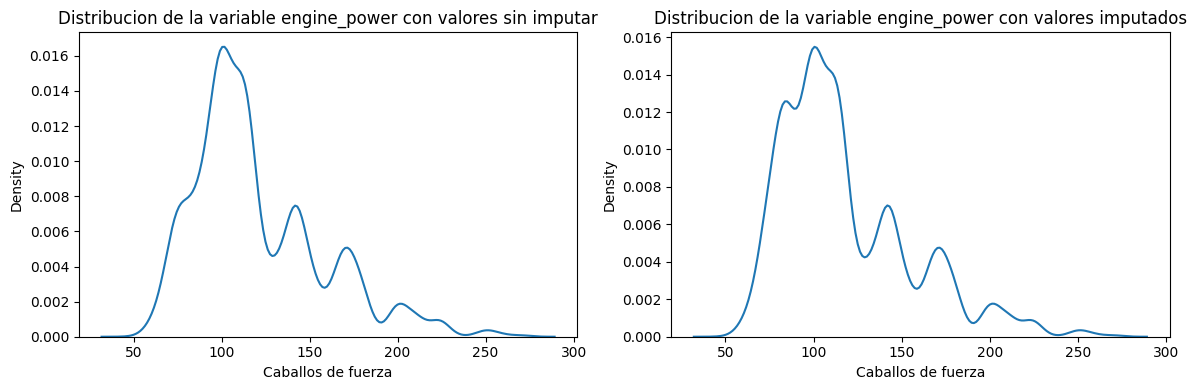

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
#sns.histplot(x=var_nan, kde=True, ax=ax[0])
sns.kdeplot(x=var_nan, ax=ax[0])
ax[0].set_title('Distribucion de la variable engine_power con valores sin imputar')
ax[0].set_xlabel('Caballos de fuerza')

sns.kdeplot(x=df.engine_power, ax=ax[1])
ax[1].set_title('Distribucion de la variable engine_power con valores imputados')
ax[1].set_xlabel('Caballos de fuerza')
plt.tight_layout()
plt.show()

In [171]:
#Se eliminan variables para liberar memoria
del df_mode
del var_nan